# Exploring Time Series Data

This is a short example showing you some of the nifty things you can do with time series data in pandas.

We'll be using hourly temperature data for Walla Walla from 2022, which was [downloaded from the EPA](https://aqs.epa.gov/aqsweb/airdata/download_files.html#Raw). (Note: I did some light pre-processing to filter out just the Walla Walla data.)

In [1]:
# import the packages we've been using all semester long
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This lets us display all the columns (without hiding)
pd.set_option('display.max_columns', None)

In [7]:
# Upload data file as a data frame
df = pd.read_csv("WW_hourly_temp_2021.csv")
df_wind = pd.read_csv("WW_hourly_wind_2021.csv")

In [4]:
# EXAMINE THE DATAFRAME
df

,Datetime,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,TempF,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,2021-01-01 00:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-01-01,00:00,2021-01-01,08:00,32.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2021-04-28
1,2021-01-01 01:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-01-01,01:00,2021-01-01,09:00,32.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2021-04-28
2,2021-01-01 02:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-01-01,02:00,2021-01-01,10:00,32.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2021-04-28
3,2021-01-01 03:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-01-01,03:00,2021-01-01,11:00,32.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2021-04-28
4,2021-01-01 04:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-01-01,04:00,2021-01-01,12:00,32.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2021-04-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,2021-12-31 19:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-12-31,19:00,2022-01-01,03:00,7.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-03-31
8751,2021-12-31 20:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-12-31,20:00,2022-01-01,04:00,5.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-03-31
8752,2021-12-31 21:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-12-31,21:00,2022-01-01,05:00,4.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-03-31
8753,2021-12-31 22:00:00,53,71,6,62101,1,46.199901,-119.008329,WGS84,Outdoor Temperature,2021-12-31,22:00,2022-01-01,06:00,4.0,Degrees Fahrenheit,-60.0,NaN,NaN,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,Washington,Walla Walla,2022-03-31


In [8]:
df_wind

,Unnamed: 0,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,Sample Measurement,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change
0,10638896,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,00:00,2021-01-01,08:00,2.5,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28
1,10638897,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,01:00,2021-01-01,09:00,2.1,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28
2,10638898,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,02:00,2021-01-01,10:00,2.2,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28
3,10638899,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,03:00,2021-01-01,11:00,2.5,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28
4,10638900,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,04:00,2021-01-01,12:00,2.7,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17445,10656341,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-12-31,19:00,2022-01-01,03:00,78.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2022-03-31
17446,10656342,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-12-31,20:00,2022-01-01,04:00,74.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2022-03-31
17447,10656343,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-12-31,21:00,2022-01-01,05:00,71.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2022-03-31
17448,10656344,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-12-31,22:00,2022-01-01,06:00,75.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2022-03-31


In [9]:
# Rename the "Sample Measurement" column to "TempF"
df = df.rename(columns={"Sample Measurement":"TempF"})
df_wind = df_wind.rename(columns={"Sample Measurement":"WindSpeed"})

Notice how in this hourly dataset, the date and time are split into two columns, "Date Local" and "Time Local".
Make a new column, "Datetime," where that combines these two into the format: "2022-01-01 1:00"
Then, use [pd.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) to convert it into a time stamp.

In [11]:
# Combine the day and the hour, and use pd.to_datetime() to turn it into a datetime object

df["Datetime"] = pd.to_datetime(df["Date Local"] + " " + df["Time Local"])
df_wind["Datetime"] = pd.to_datetime(df_wind["Date Local"] + " " + df_wind["Time Local"])
df_wind

,Unnamed: 0,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,WindSpeed,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change,Datetime
0,10638896,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,00:00,2021-01-01,08:00,2.5,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28,2021-01-01 00:00:00
1,10638897,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,01:00,2021-01-01,09:00,2.1,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28,2021-01-01 01:00:00
2,10638898,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,02:00,2021-01-01,10:00,2.2,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28,2021-01-01 02:00:00
3,10638899,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,03:00,2021-01-01,11:00,2.5,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28,2021-01-01 03:00:00
4,10638900,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-01-01,04:00,2021-01-01,12:00,2.7,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-04-28,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17445,10656341,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-12-31,19:00,2022-01-01,03:00,78.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2022-03-31,2021-12-31 19:00:00
17446,10656342,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-12-31,20:00,2022-01-01,04:00,74.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2022-03-31,2021-12-31 20:00:00
17447,10656343,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-12-31,21:00,2022-01-01,05:00,71.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2022-03-31,2021-12-31 21:00:00
17448,10656344,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-12-31,22:00,2022-01-01,06:00,75.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2022-03-31,2021-12-31 22:00:00


In [13]:
# Reset the index to the "Datetime" column
# This lets us use the "Datetime" to slice and dice our data frame
# Note: Using drop=False lets us keep the Datetime as a column in our dataframe as well as an index
# which is handy if we want to use it later
df = df.set_index(["Datetime"], drop=False)
df_wind = df_wind.set_index(["Datetime"], drop=False)

# And sort by the "Datetime" to make sure all the hours are displaying in order
df = df.sort_index()
df_wind = df_wind.sort_index()

In [16]:
# Demonstrate how you can select by .loc using a date or datetime
#df_wind.loc["2021-03"]
#df_wind.loc["2021-03-01"]
df_wind.loc["2021-03-01 12:00:00"]

,Unnamed: 0,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Date Local,Time Local,Date GMT,Time GMT,WindSpeed,Units of Measure,MDL,Uncertainty,Qualifier,Method Type,Method Code,Method Name,State Name,County Name,Date of Last Change,Datetime
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-01 12:00:00,10649025,53,71,6,61104,1,46.199901,-119.008329,WGS84,Wind Direction - Resultant,2021-03-01,12:00,2021-03-01,20:00,235.0,Degrees Compass,1.0,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-07-02,2021-03-01 12:00:00
2021-03-01 12:00:00,10640300,53,71,6,61103,1,46.199901,-119.008329,WGS84,Wind Speed - Resultant,2021-03-01,12:00,2021-03-01,20:00,3.0,Knots,0.1,NaN,NaN,Non-FRM,130,RM Young Ultrasonic Wind Sensor model 85004 - ...,Washington,Walla Walla,2021-07-02,2021-03-01 12:00:00


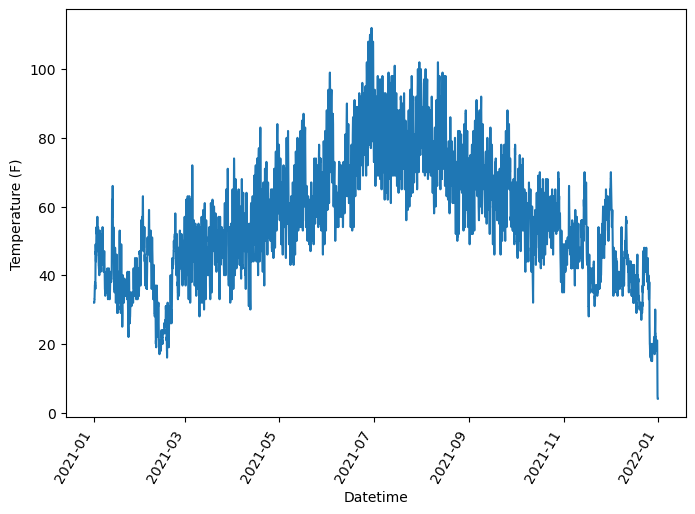

In [19]:
# Let's make a plot of the temperature for the whole year
fig, axs = plt.subplots(figsize=(8, 6))

df["TempF"].plot(kind='line', rot=60, ax=axs)


plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Temperature (F)")

plt.show()

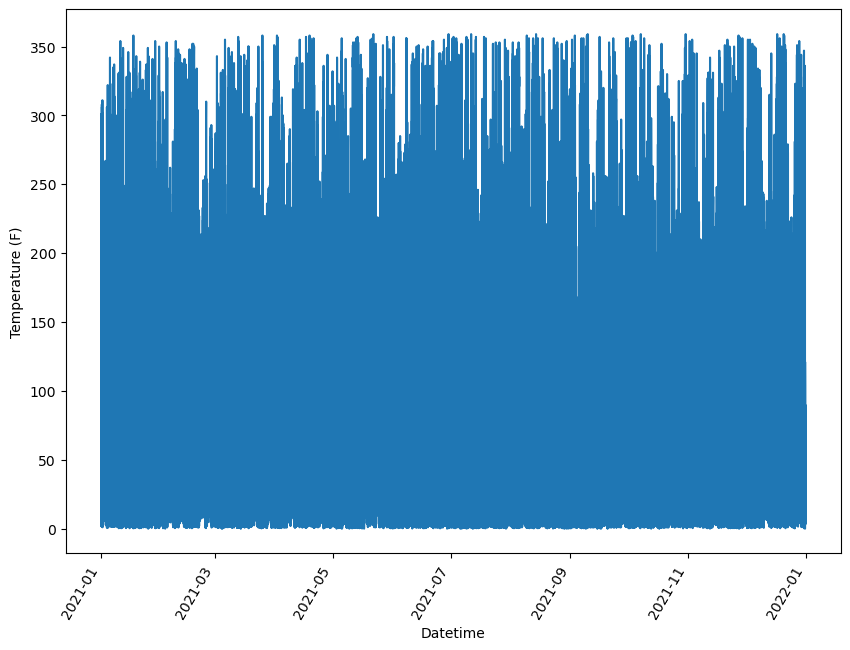

In [18]:
# Let's make a plot of the temperature for the whole year
fig, axs = plt.subplots(figsize=(10, 8))

df_wind["WindSpeed"].plot(kind='line', rot=60, ax=axs)


plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Temperature (F)")

plt.show()

Because our dataframe now has a Datetime index, we can select a subset easily. Let's plot the month of June.

In [20]:
# Select the month of June
june = df.loc["2021-06"]

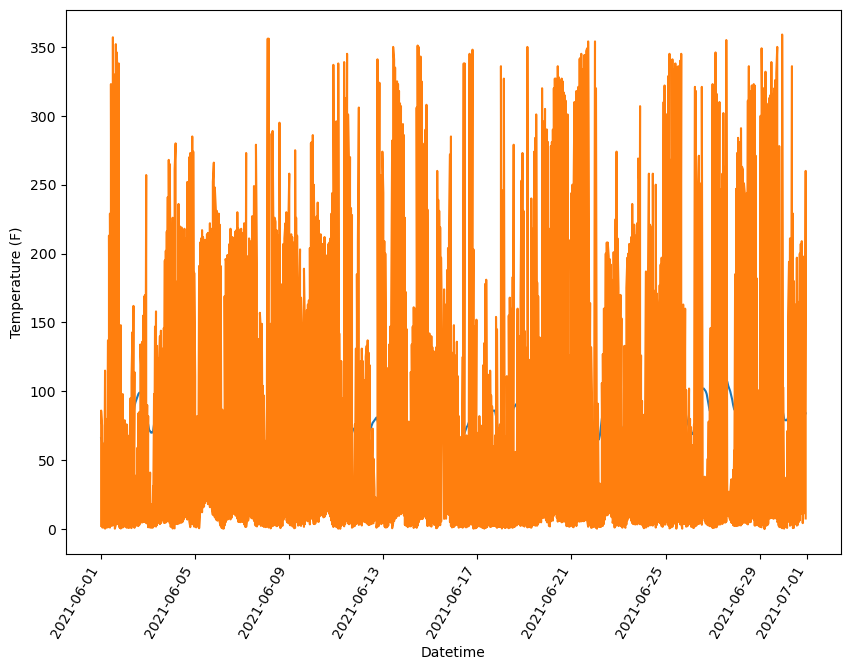

In [26]:
# And plot it
# I've included the portions to make the canvas and the axes labels
fig, axs = plt.subplots(figsize=(10, 8))


june["TempF"].plot(kind='line', rot=60, ax=axs)

plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Temperature (F)") # custom y label using Matplotlib

plt.show()

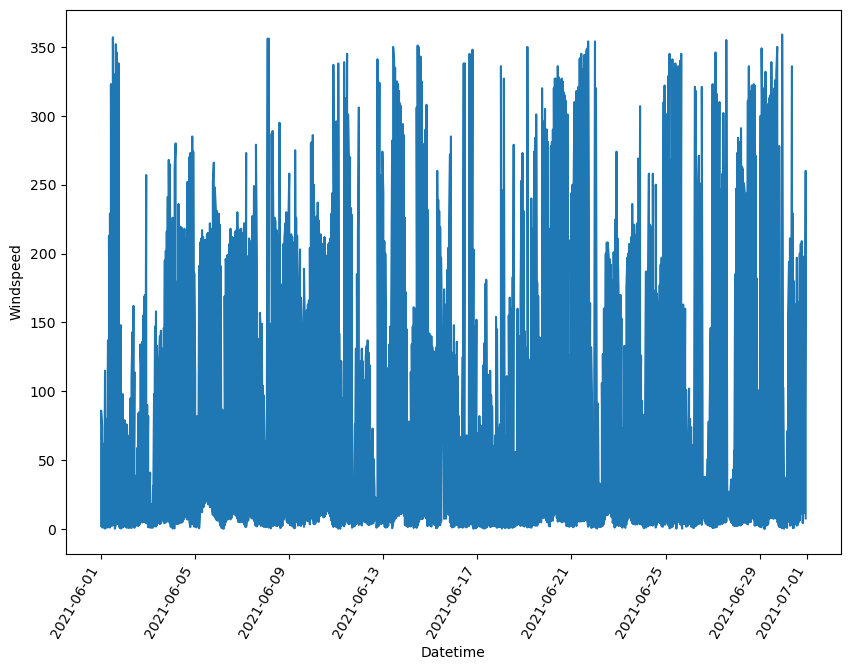

In [27]:
# And plot it
# I've included the portions to make the canvas and the axes labels
fig, axs = plt.subplots(figsize=(10, 8))

df_wind["WindSpeed"].loc["2021-06"].plot(kind='line', rot=60, ax=axs)

plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Windspeed") # custom y label using Matplotlib

plt.show()

We can also "resample" -- that is, turn it from hourly data into daily or weekly or monthly data.

To do this, we have to tell it HOW to pick: min, max, median, etc.

In [28]:
# 'Y' tells it to sample one value per year
# This is the mean yearly temp
df["TempF"].resample('Y', level=0).mean()

Datetime
2021-12-31    56.899029
Freq: A-DEC, Name: TempF, dtype: float64

In [29]:
# 'D' tells it to sample one value per day
# Here we are sampling the min Daily temp
df["TempF"].resample('D', level=0).min()

Datetime
2021-01-01    32.0
2021-01-02    44.0
2021-01-03    43.0
2021-01-04    40.0
2021-01-05    41.0
              ... 
2021-12-27    15.0
2021-12-28    15.0
2021-12-29    17.0
2021-12-30    20.0
2021-12-31     4.0
Freq: D, Name: TempF, Length: 365, dtype: float64

In [30]:
# 'M' tells it to sample one value per month
# Here we are extracting the monthly max temp
df["TempF"].resample('M', level=0).max()

Datetime
2021-01-31     66.0
2021-02-28     63.0
2021-03-31     72.0
2021-04-30     84.0
2021-05-31     88.0
2021-06-30    112.0
2021-07-31    102.0
2021-08-31    102.0
2021-09-30     92.0
2021-10-31     75.0
2021-11-30     70.0
2021-12-31     70.0
Freq: M, Name: TempF, dtype: float64

In [32]:
# You try!
# Use the resample method to answer the following:

# WHAT WAS THE MAX TEMP IN 2021?
df["TempF"].resample('Y', level=0).max()

# WHAT WAS THE MIN TEMP IN 2021?
df["TempF"].resample('Y', level=0).min()

Datetime
2021-12-31    4.0
Freq: A-DEC, Name: TempF, dtype: float64

In [34]:
df_wind["WindSpeed"].resample('M', level=0).mean()

Datetime
2021-01-31     97.464986
2021-02-28    112.025988
2021-03-31     97.920553
2021-04-30     85.226319
2021-05-31     98.466555
2021-06-30     97.856337
2021-07-31     77.420822
2021-08-31     91.530712
2021-09-30     87.217847
2021-10-31     93.855922
2021-11-30     99.638633
2021-12-31    107.329772
Freq: M, Name: WindSpeed, dtype: float64

So now, using resample, it's super easy to make plots of, say:
* The daily max and the daily min
* The monthly average temp
* etc.

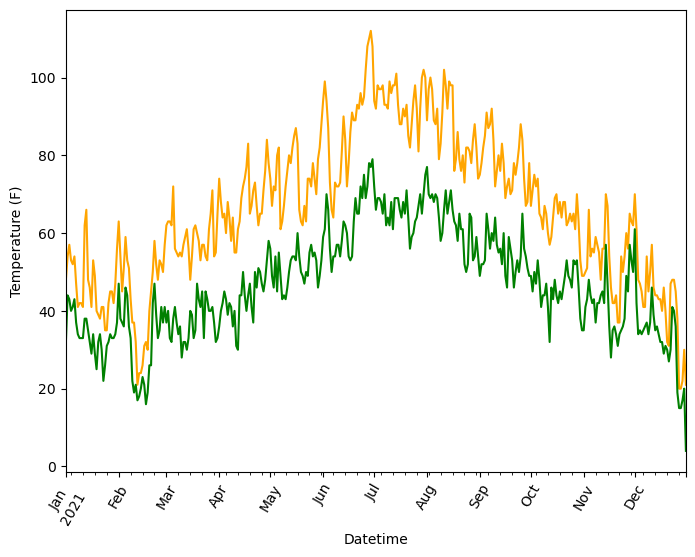

In [35]:
# Daily max and daily min on the same plot

fig, axs = plt.subplots(figsize=(8, 6))

# Daily max -- we sample on the day by the max value
df["TempF"].resample('D').max().plot(kind='line', rot=60, ax=axs, color="orange")

# Daily min -- we sample on the day by the min value
df["TempF"].resample('D').min().plot(kind='line', rot=60, ax=axs, color="green")

plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Temperature (F)")

plt.show()

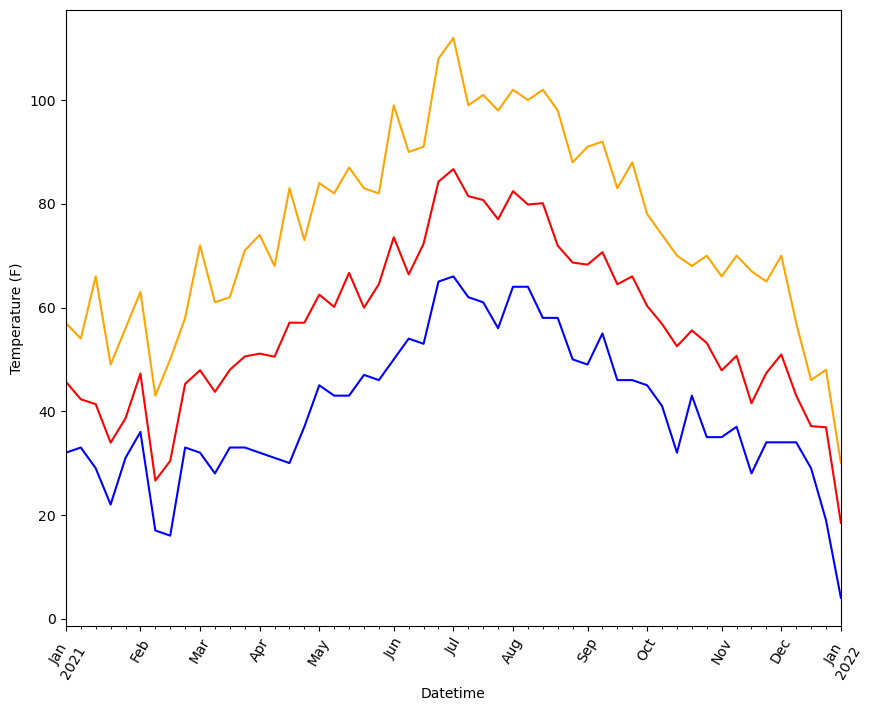

In [36]:
# Now you try...

# MAKE A LINE PLOT OF THE MEAN, MIN, AND MAX WEEKLY TEMPERATURES FOR ALL OF 2022
# PUT THEM ALL ON THE SAME PLOT

# Make the figure and axes
fig, axs = plt.subplots(figsize=(10, 8))

# Weekly max -- we sample on the day by the max value
df["TempF"].resample('W').max().plot(kind='line', rot=60, ax=axs, color="orange")

# Weekly min -- we sample on the day by the min value
df["TempF"].resample('W').min().plot(kind='line', rot=60, ax=axs, color="blue")

# Weekly mean -- we sample on the day by the min value
df["TempF"].resample('W').mean().plot(kind='line', rot=60, ax=axs, color="red")

plt.xlabel("Datetime")  # custom x label using Matplotlib

plt.ylabel("Temperature (F)")

plt.show()

How might we use Seaborn, which is really good at visualizing distributions, to visualize this data in a different way?

Let's look at the distribution of temperatures over each month.

First, to simplify things, let's make a new column that tells us the month of each measurement. Remember, because we now have the timestamp of the measurement as a datetime object, we can easily extract the month.

In [37]:
# Add a new month column
df["Month"] = df["Datetime"].dt.month

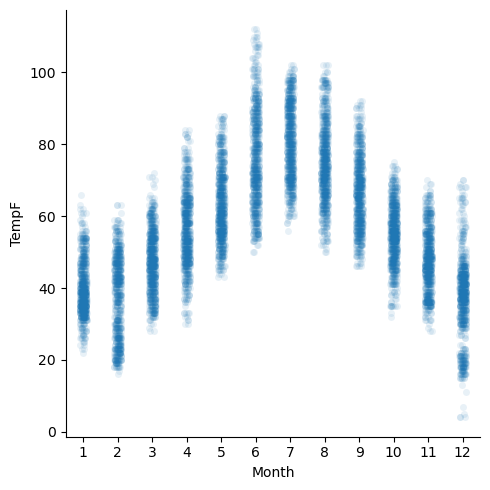

In [38]:
# Now let's look at it as a Seaborn catplot

sns.catplot(data=df, x="Month", y="TempF", alpha=0.1)

<Axes: xlabel='Datetime', ylabel='TempF'>

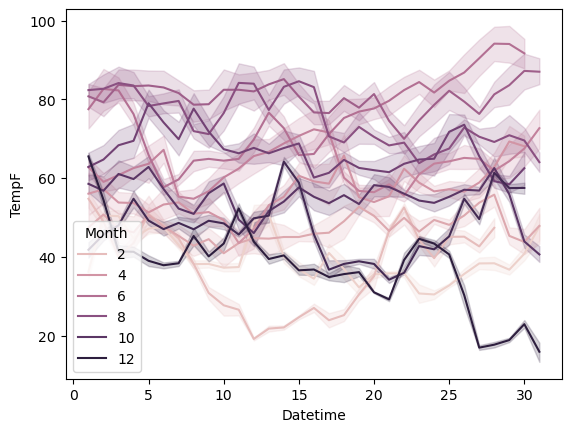

In [39]:
# Or we could look at them as a bunch of lines on the same plot

sns.lineplot(data=df, x=df["Datetime"].dt.day, y="TempF", hue="Month")

This last visualization is a bit messy and strange, but it's actually really cool! All of the months are overlapping on top of each other. 
 
 What do you think the thick band around each line represents? This is the standard deviation of temperature measurements (on each day) -- so the width of it tells you how variable the temperature is.
 
 If you look at each line, you can also tell if you are in a month where the temperature is getting warmer, or if it is terending colder.
 

 Ok, let's try one more...

<Axes: xlabel='TempF', ylabel='Month'>

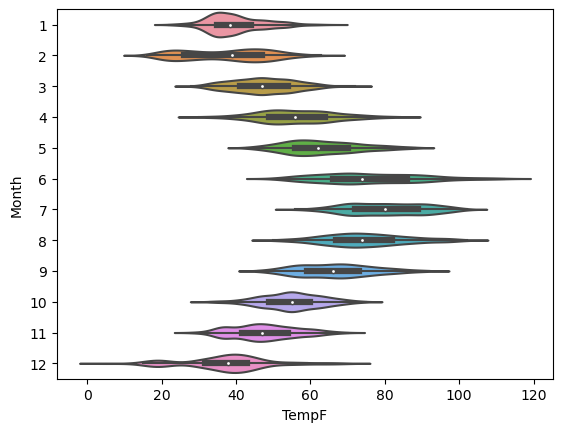

In [40]:
# Horizontal plot, showing distribution of temperatures for each month
sns.violinplot(df, x="TempF", y="Month", orient="h", fill=False)


I hope you can start to see how Seaborn lets you easily try out a bunch of different chart types and layouts.

### Challenge
Look at the [Gallery](https://seaborn.pydata.org/examples/index.html) and find some unusual examples? How might you implement them (for example, check out the [ridge plot](https://seaborn.pydata.org/examples/kde_ridgeplot.html))?

### Challenge
In the zipped file for today, I also included wind speed data ("WW_hourly_wind_2021.csv"). Import these files. How might you use them to create some relationship plots (i.e. scatterplots, examining correlations) using Seaborn?